In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

In [5]:
import hickle as hkl
data_path = get_data_dir_path()
run_name = "test_run_catsim"

In [6]:
madness_results=[]
scarlet_results=[]

actual_photometry = []
madness_photometry = []
scarlet_photometry = []
blended_photometry = []

for file_num in range(13):

    madness_results.append(hkl.load(os.path.join(data_path, "results", run_name, "madness_reconstruction", str(file_num) + ".hkl")))
    scarlet_results.append(hkl.load(os.path.join(data_path, "results", run_name, "scarlet_reconstruction", str(file_num) + ".hkl")))

    actual_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "actual_photometry", str(file_num) + ".hkl")))
    madness_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "madness_photometry", str(file_num) + ".hkl")))
    scarlet_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "scarlet_photometry", str(file_num) + ".hkl")))
    blended_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "blended_photometry",  str(file_num) + ".hkl")))


        
madness_results = vstack(madness_results)
scarlet_results = vstack(scarlet_results)

actual_photometry = vstack(actual_photometry)
madness_photometry = vstack(madness_photometry)
scarlet_photometry = vstack(scarlet_photometry)
blended_photometry = vstack(blended_photometry)

In [7]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    madness_results[band+"_relative_flux_err"] = (madness_results[band+"_predicted_flux"]-madness_results[band+"_actual_flux"])/madness_results[band+"_actual_flux"]
    scarlet_results[band+"_relative_flux_err"] = (scarlet_results[band+"_predicted_flux"]-scarlet_results[band+"_actual_flux"])/scarlet_results[band+"_actual_flux"]

In [8]:
scarlet_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,ref_mag,btk_size,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.996926388335915,4732.278529324918,4721.20787499956,0.0004567596094701143,0.9968192246599213,42882.695380978344,41642.4882440072,0.0008510651964523941,0.9966647620806132,76714.5226517421,73619.37248076661,0.0026563819324444404,0.9966008219434649,75846.9078661974,74539.46861048677,0.008076660605699115,0.9965297212570112,55949.01342081808,66443.69479045535,0.01281954687123854,0.9964958360538042,31335.738248827634,32140.13702646276,0.018584353093924033,0,1.7445692544209814,0,0,402703080082,12.312215341975133,1.1502970222887008,1.73266017437,1.5320470619e-19,9.78131396331e-18,0.0,0.151373192668,0.377244889736,0.140172094107,0.160035997629,100.085762024,100.085762024,25.2746982574,25.128944397,25.2417583466,24.9340610504,24.7226409912,24.5219554901,24.9340610504,1.7445692544209814,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.0023393919560642327,-0.028920923135845256,-0.04034633944118264,-0.017237871555912405,0.18757580747138433,0.025670331148659603
0.9983829657547167,212.72188240204514,4.812022716412974e-20,0.007659897208694422,0.998144464890296,6187.892281871194,6131.544403610591,0.0022293185461399467,0.9977639887586784,42634.10954322567,38220.64903024342,0.0006817549569678727,0.9975863902445177,54818.24638049182,58209.09822239039,0.0006925381607659764,0.9973920233481717,42331.44085779099,45345.27709633411,0.0007808943811300484,0.9972937436788272,22603.01350337747,25666.58703614287,0.0009442343705525769,1,0.54747635811786,0,0,402704010386,14.544104257126662,7.114506678623506,0.514555215836,0.0,2.44372396723e-18,0.0,0.0,0.117484197021,0.0,0.0930875986814,0.0,184.611495972,28.640838623,27.2301483154,25.8790225983,25.2860469818,25.0248985291,24.8760795593,25.2860469818,0.54747635811786,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.009106150478037102,-0.10351947209094525,0.06185626257291719,0.07119616477662202,0.13553827821708922
0.9729064213280849,7583.878761127966,4316.389013662947,0.038527284942228124,0.9722495870035439,61627.26560145305,38145.499132888246,0.03474778008841117,0.9712733636043361,139240.74467678566,98004.00203904216,0.0281256082186907,0.9708740686709615,193045.04446010268,143572.85558889847,0.01716505177334049,0.9704271668511373,200234.55812212254,135400.4803403482,0.011637882189885707,0.9702190726874234,146687.6179450975,110308.34831635587,0.010250428534733014,2,8.552861784678209,0,0,402701293187,-6.411101875014888,14.782820665450881,1.57977795601,1.06596002756e-17,3.39454210789e-17,0.0,0.839683413506,2.09873700142,0.695491611958,1.26851809025,130.707138062,130.707138062,24.7517948151,24.7244224548,24.5837993622,23.9089946747,23.327495575,22.83527565,23.9089946747,8.552861784678209,69.94449061462393,175.9141034893985,0.0,0.0,0.0,0.0,0.0,0.0,-0.4308467804381195,-0.

In [9]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
1869.0686278128628,207.50707000380135,0,20998.309838867193,823.6758373292251,0,38543.92521408082,1895.9181420224875,0,38455.82110809326,2273.089184348032,0,32353.602714996345,2653.5360964192673,0,15484.190181083684,2852.618846779219,0,0,0,0
82.2918996167183,207.36047368030842,0,3786.3084299469006,823.0939398088168,0,24993.55930435181,1894.578743662427,0,35365.100234375,2271.4833281360443,0,27440.52710998536,2651.6614680705384,0,17421.505923614506,2850.6035735875307,0,1,0,0
752.5844142150879,207.65356283532228,0,7583.148140563964,824.2573240499595,0,18081.233221130376,1897.256594813285,0,28206.439663829802,2274.69390688066,0,29076.278076171875,2655.4094013447348,0,22122.008253555297,2854.6326972572147,0,2,0,0
2601.716170349122,207.65356283532225,0,37837.5326538086,824.2573240499597,0,71422.84467773439,1897.256594813285,0,52762.357893066415,2274.69390688066,0,42750.96041137697,2655.4094013447343,0,23253.507841949468,2854.632697257215,0,3,0,0
1806.8796957027919,207.50707000380135,0,19309.975137329104,823.675837329225,0,66131.3921386719,1895.9181420224872,0,91851.17051757814,2273.089184348032,0,68578.5175671387,2653.5360964192673,0,34131.90071189881,2852.6188467792194,0,4,0,0
2896.353599243165,207.7999523937476,0,23687.529962158205,824.8384008398251,0,46155.18943115235,1898.5941040346145,0,39252.25398986817,2276.2974981315606,0,23601.117479705816,2657.281385645864,0,15275.278341674808,2856.6451280304314,0,5,0,0
9739.045627136233,206.33138309146648,0,78150.84606933595,819.0090811462351,0,253559.9458007813,1885.1763097254327,0,323536.48357421876,2260.210388437324,0,324975.87382812507,2638.501776577003,0,189947.91485351571,2836.4565702650907,0,6,0,0
3120.764267234802,207.36047368030842,0,21980.239586181644,823.0939398088167,0,44324.56876220703,1894.578743662427,0,40610.14360595703,2271.4833281360443,0,23486.070417671202,2651.661468070538,0,10654.571241989139,2850.603573587531,0,7,0,0
779.1828758049012,207.65356283532228,0,15070.58556427002,824.2573240499596,0,35027.01804424287,1897.256594813285,0,24669.53191726685,2274.69390688066,0,15962.416523666381,2655.4094013447348,0,7608.400471314195,2854.6326972572147,0,8,0,0


### Plot the correlations

(0.98, 1.0)

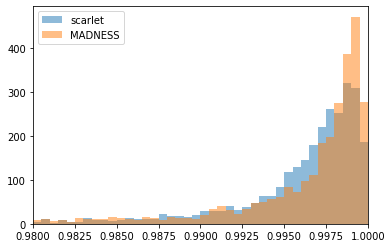

In [10]:
bins = np.arange(0.95, 1, 0.0005)
plt.hist(scarlet_results['r_covariance'], bins=bins, alpha=0.5, label="scarlet")
plt.hist(madness_results['r_covariance'], bins=bins, alpha=0.5, label="MADNESS")
plt.legend()
plt.xlim([0.98, 1])

### Plot the relative flux error

In [11]:
def gauss(x, sig, mu, a):
    return np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

In [12]:
from scipy.optimize import curve_fit
from scipy.stats import norm

Madness mu: 0.11550103654084717
Madness sig: 1.0377647433761066
Scarlet mu: -0.008218631829953915
Scarlet sig: 0.22389644463163696


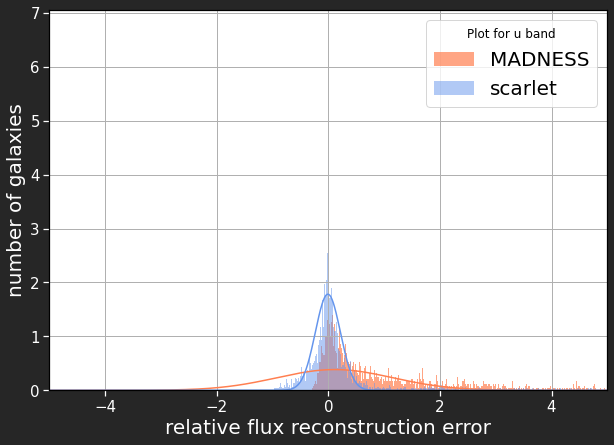

Madness mu: 0.37087926561750045
Madness sig: 0.468035771850323
Scarlet mu: 0.0011915226643450785
Scarlet sig: 0.09342698973919182


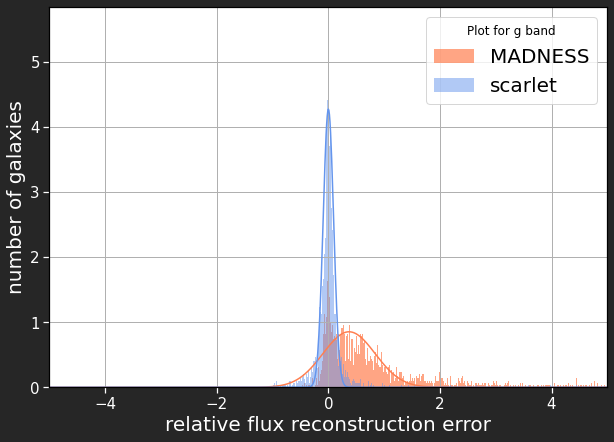

Madness mu: -0.038954375577308534
Madness sig: 0.17529641941718868
Scarlet mu: 0.004188233913038269
Scarlet sig: 0.07601451606358887


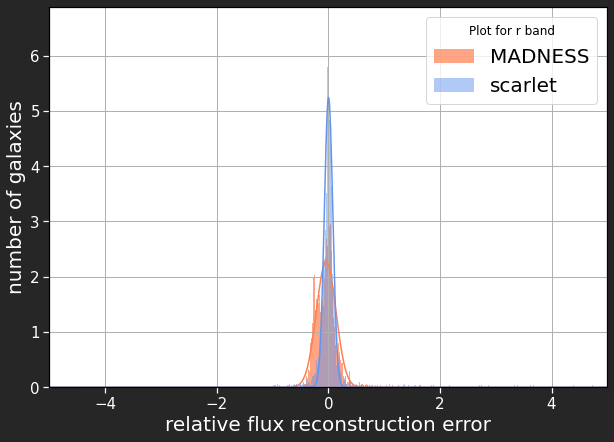

Madness mu: -0.4127310303458877
Madness sig: 0.22363892710916944
Scarlet mu: 0.00982335772221535
Scarlet sig: 0.08001535341096302


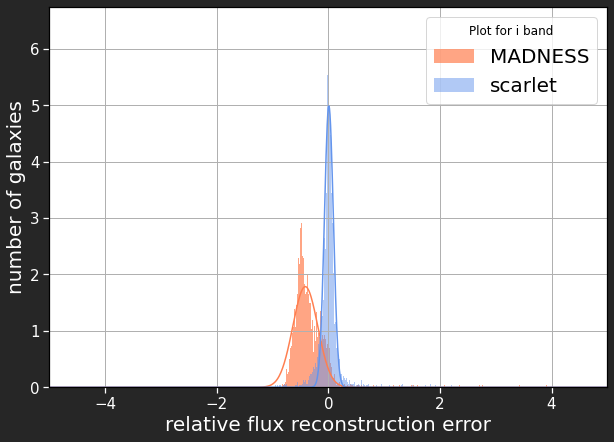

Madness mu: -0.5915494399264888
Madness sig: 0.18521863159725863
Scarlet mu: 0.007295801458000855
Scarlet sig: 0.10046539110947597


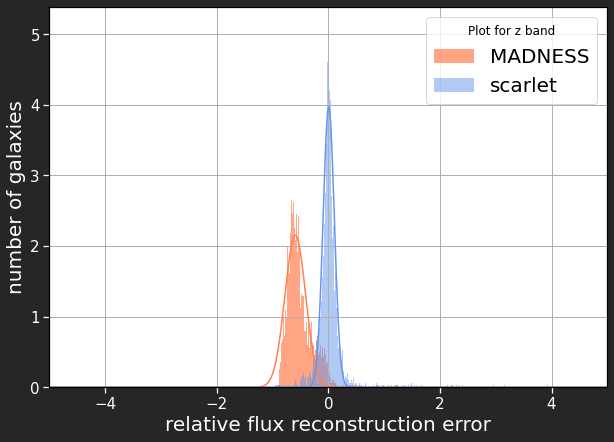

Madness mu: -0.6678473564905928
Madness sig: 0.1530075923545481
Scarlet mu: -0.002201202988095678
Scarlet sig: 0.15415035647836484


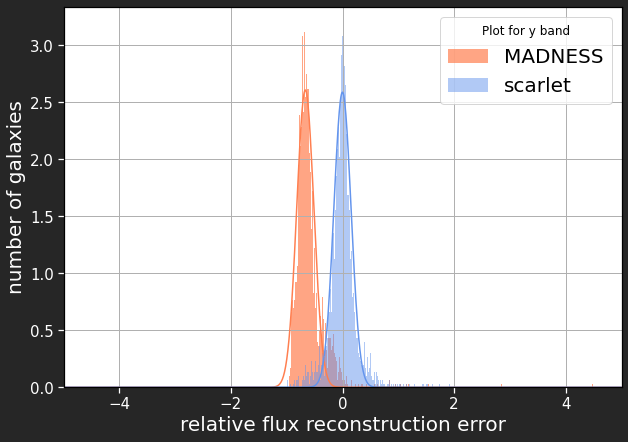

In [27]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].value
    madness_predicted_flux = madness_results[band+"_predicted_flux"].value

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
    sns.set_theme(style={"axes.grid": True,
                     'axes.labelcolor': 'white',
                     'figure.facecolor': '.15',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'text.color': 'black',
                     'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-5, 5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-5, 5])
    plt.show()

# Compare apperture photometry

In [14]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
1869.0686278128628,207.50707000380135,0,20998.309838867193,823.6758373292251,0,38543.92521408082,1895.9181420224875,0,38455.82110809326,2273.089184348032,0,32353.602714996345,2653.5360964192673,0,15484.190181083684,2852.618846779219,0,0,0,0
82.2918996167183,207.36047368030842,0,3786.3084299469006,823.0939398088168,0,24993.55930435181,1894.578743662427,0,35365.100234375,2271.4833281360443,0,27440.52710998536,2651.6614680705384,0,17421.505923614506,2850.6035735875307,0,1,0,0
752.5844142150879,207.65356283532228,0,7583.148140563964,824.2573240499595,0,18081.233221130376,1897.256594813285,0,28206.439663829802,2274.69390688066,0,29076.278076171875,2655.4094013447348,0,22122.008253555297,2854.6326972572147,0,2,0,0
2601.716170349122,207.65356283532225,0,37837.5326538086,824.2573240499597,0,71422.84467773439,1897.256594813285,0,52762.357893066415,2274.69390688066,0,42750.96041137697,2655.4094013447343,0,23253.507841949468,2854.632697257215,0,3,0,0
1806.8796957027919,207.50707000380135,0,19309.975137329104,823.675837329225,0,66131.3921386719,1895.9181420224872,0,91851.17051757814,2273.089184348032,0,68578.5175671387,2653.5360964192673,0,34131.90071189881,2852.6188467792194,0,4,0,0
2896.353599243165,207.7999523937476,0,23687.529962158205,824.8384008398251,0,46155.18943115235,1898.5941040346145,0,39252.25398986817,2276.2974981315606,0,23601.117479705816,2657.281385645864,0,15275.278341674808,2856.6451280304314,0,5,0,0
9739.045627136233,206.33138309146648,0,78150.84606933595,819.0090811462351,0,253559.9458007813,1885.1763097254327,0,323536.48357421876,2260.210388437324,0,324975.87382812507,2638.501776577003,0,189947.91485351571,2836.4565702650907,0,6,0,0
3120.764267234802,207.36047368030842,0,21980.239586181644,823.0939398088167,0,44324.56876220703,1894.578743662427,0,40610.14360595703,2271.4833281360443,0,23486.070417671202,2651.661468070538,0,10654.571241989139,2850.603573587531,0,7,0,0
779.1828758049012,207.65356283532228,0,15070.58556427002,824.2573240499596,0,35027.01804424287,1897.256594813285,0,24669.53191726685,2274.69390688066,0,15962.416523666381,2655.4094013447348,0,7608.400471314195,2854.6326972572147,0,8,0,0


In [15]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
1863.3980374455457,207.50707000380135,0,20996.053946533215,823.6758373292251,0,38543.87788894654,1895.9181420224875,0,38550.93349647521,2273.089184348032,0,32515.270080108643,2653.5360964192673,0,15602.179925003053,2852.618846779219,0,0,0,0
82.64959246397012,207.36047368030842,0,3789.577656402589,823.0939398088168,0,25001.36653091431,1894.578743662427,0,35375.95783691407,2271.4833281360443,0,27450.45536941529,2651.6614680705384,0,17428.07891967774,2850.6035735875307,0,1,0,0
753.3951940369606,207.65356283532228,0,7589.131368408205,824.2573240499595,0,18090.23263671875,1897.256594813285,0,28213.879529380803,2274.69390688066,0,29082.79545196533,2655.4094013447348,0,22126.821421585086,2854.6326972572147,0,2,0,0
2594.987785110474,207.65356283532225,0,37467.51318603516,824.2573240499597,0,70946.01955322266,1897.256594813285,0,52829.001561279314,2274.69390688066,0,43226.58153015138,2655.4094013447343,0,23662.28527780533,2854.632697257215,0,3,0,0
1807.454908473492,207.50707000380135,0,19313.023273315437,823.675837329225,0,66140.72274902344,1895.9181420224872,0,91859.28592773441,2273.089184348032,0,68590.76259033206,2653.5360964192673,0,34136.96894340517,2852.6188467792194,0,4,0,0
2904.6663415527346,207.7999523937476,0,23787.04330871582,824.8384008398251,0,46386.967954101565,1898.5941040346145,0,39562.315764160165,2276.2974981315606,0,23939.312983398446,2657.281385645864,0,15519.326166992189,2856.6451280304314,0,5,0,0
9751.399096984866,206.33138309146648,0,78125.9124658203,819.0090811462351,0,253387.64980468756,1885.1763097254327,0,323541.3175195313,2260.210388437324,0,325041.3960351564,2638.501776577003,0,190036.4016796875,2836.4565702650907,0,6,0,0
3121.0496594238284,207.36047368030842,0,21982.89743896485,823.0939398088167,0,44331.36617187501,1894.578743662427,0,40618.11808349611,2271.4833281360443,0,23493.015713415152,2651.661468070538,0,10658.518793411256,2850.603573587531,0,7,0,0
190.12276877880092,207.65356283532228,0,12263.059238281256,824.2573240499596,0,31670.721327972413,1897.256594813285,0,23166.5448400879,2274.69390688066,0,15461.694231758123,2655.4094013447348,0,7417.207378888133,2854.6326972572147,0,8,0,0


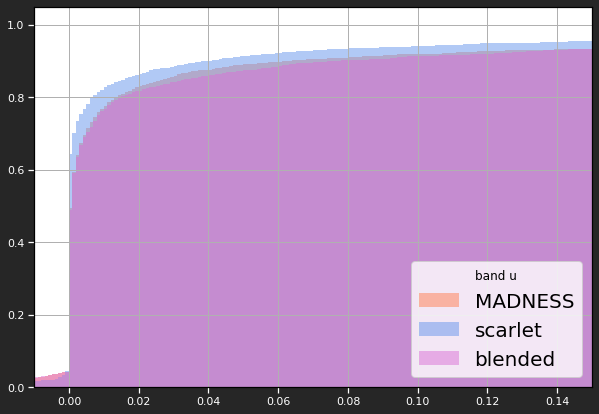

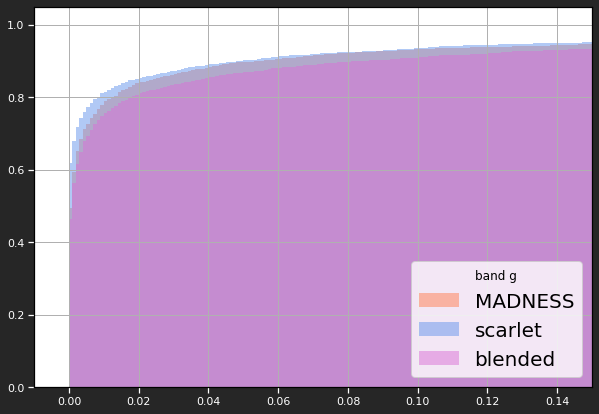

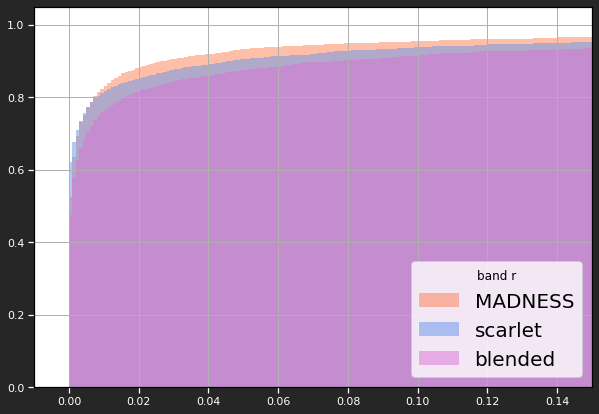

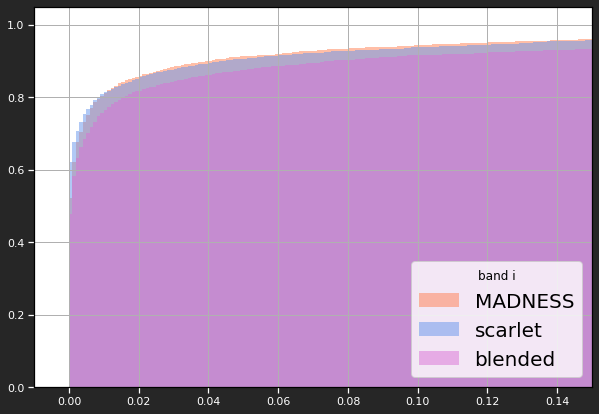

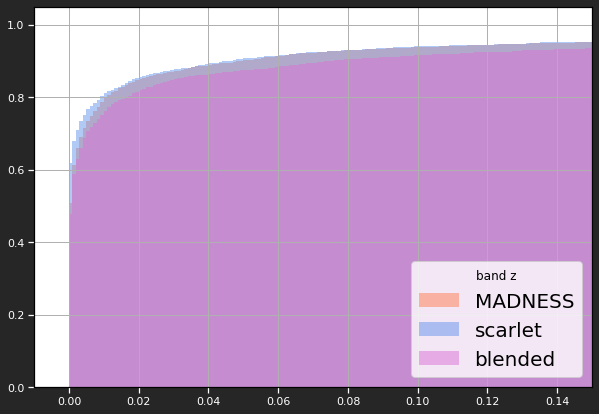

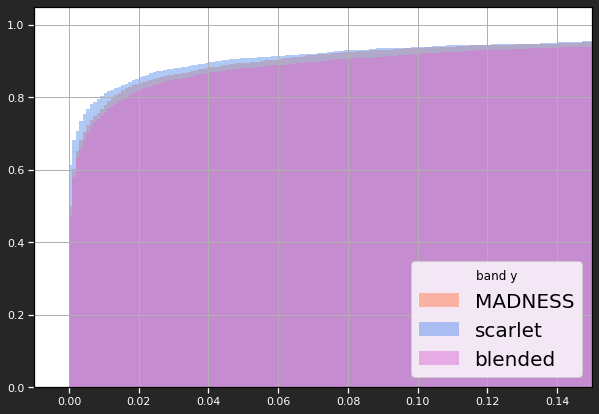

In [16]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    plt.figure(figsize=(10, 7))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.5,
        density=True,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    plt.hist(
        np.abs((scarlet_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        density=True,
        alpha=0.5,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        (blended_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.5,
        density=True,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    plt.xlim([-.01, .15])

    plt.legend(fontsize=20, title="band " + band, loc="lower right")
    plt.show()

# error variation plots

/tmp/ipykernel_11040/4022407744.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
/tmp/ipykernel_11040/4022407744.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(h[3])


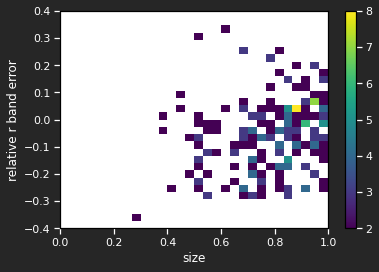

In [17]:
h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
plt.xlabel("size")
plt.ylabel("relative r band error")
plt.colorbar(h[3])
#plt.ylim(-.1,.1)

# Plot SNR

In [18]:
madness_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,ref_mag,btk_size,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.994121579944434,4732.278529324918,4722.106398476171,0.0004567596094701143,0.9968380155468125,42882.695380978344,40878.73383425176,0.0008510651964523941,0.9965292778349283,76714.5226517421,80775.65600164235,0.0026563819324444404,0.9961827105748687,75846.9078661974,60223.749368451536,0.008076660605699115,0.9954886465031951,55949.01342081808,35860.997459385544,0.01281954687123854,0.9910901112024092,31335.738248827634,16954.629828687757,0.018584353093924033,0,1.7445692544209814,0,0,402703080082,12.312215341975133,1.1502970222887008,1.73266017437,1.5320470619e-19,9.78131396331e-18,0.0,0.151373192668,0.377244889736,0.140172094107,0.160035997629,100.085762024,100.085762024,25.2746982574,25.128944397,25.2417583466,24.9340610504,24.7226409912,24.5219554901,24.9340610504,1.7445692544209814,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.0021495207405295837,-0.046731240397157696,0.05293826005196458,-0.20598280058175744,-0.35904146888777816,-0.45893632075759117
0.9607971362804539,212.72188240204514,2615.159033375676,0.007659897208694422,0.9765236360147576,6187.892281871194,21193.463148083538,0.0022293185461399467,0.9763792472555756,42634.10954322567,41408.51738862693,0.0006817549569678727,0.9740379995308605,54818.24638049182,31292.761550284922,0.0006925381607659764,0.9725221158219313,42331.44085779099,18058.155034668744,0.0007808943811300484,0.9649800109633458,22603.01350337747,8933.229977265,0.0009442343705525769,1,0.54747635811786,0,0,402704010386,14.544104257126662,7.114506678623506,0.514555215836,0.0,2.44372396723e-18,0.0,0.0,0.117484197021,0.0,0.0930875986814,0.0,184.611495972,28.640838623,27.2301483154,25.8790225983,25.2860469818,25.0248985291,24.8760795593,25.2860469818,0.54747635811786,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,11.293794149644725,2.4249890241584358,-0.02874675155009721,-0.42915427587590466,-0.573410338303068,-0.6047770366579596
0.7977170340570127,7583.878761127966,5446.107636962552,0.038527284942228124,0.8669470406269879,61627.26560145305,33186.26428022981,0.03474778008841117,0.8563551001803005,139240.74467678566,66273.77818338573,0.0281256082186907,0.8547492113863958,193045.04446010268,49704.772690311074,0.01716505177334049,0.8370092309460142,200234.55812212254,28414.655555970967,0.011637882189885707,0.8422780437966888,146687.6179450975,13500.694006215781,0.010250428534733014,2,8.552861784678209,0,0,402701293187,-6.411101875014888,14.782820665450881,1.57977795601,1.06596002756e-17,3.39454210789e-17,0.0,0.839683413506,2.09873700142,0.695491611958,1.26851809025,130.707138062,130.707138062,24.7517948151,24.7244224548,24.5837993622,23.9089946747,23.327495575,22.83527565,23.9089946747,8.552861784678209,69.94449061462393,175.9141034893985,0.0,0.0,0.0,0.0,0.0,0.0,-0.28188361

In [19]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
1863.3980374455457,207.50707000380135,0,20996.053946533215,823.6758373292251,0,38543.87788894654,1895.9181420224875,0,38550.93349647521,2273.089184348032,0,32515.270080108643,2653.5360964192673,0,15602.179925003053,2852.618846779219,0,0,0,0
82.64959246397012,207.36047368030842,0,3789.577656402589,823.0939398088168,0,25001.36653091431,1894.578743662427,0,35375.95783691407,2271.4833281360443,0,27450.45536941529,2651.6614680705384,0,17428.07891967774,2850.6035735875307,0,1,0,0
753.3951940369606,207.65356283532228,0,7589.131368408205,824.2573240499595,0,18090.23263671875,1897.256594813285,0,28213.879529380803,2274.69390688066,0,29082.79545196533,2655.4094013447348,0,22126.821421585086,2854.6326972572147,0,2,0,0
2594.987785110474,207.65356283532225,0,37467.51318603516,824.2573240499597,0,70946.01955322266,1897.256594813285,0,52829.001561279314,2274.69390688066,0,43226.58153015138,2655.4094013447343,0,23662.28527780533,2854.632697257215,0,3,0,0
1807.454908473492,207.50707000380135,0,19313.023273315437,823.675837329225,0,66140.72274902344,1895.9181420224872,0,91859.28592773441,2273.089184348032,0,68590.76259033206,2653.5360964192673,0,34136.96894340517,2852.6188467792194,0,4,0,0
2904.6663415527346,207.7999523937476,0,23787.04330871582,824.8384008398251,0,46386.967954101565,1898.5941040346145,0,39562.315764160165,2276.2974981315606,0,23939.312983398446,2657.281385645864,0,15519.326166992189,2856.6451280304314,0,5,0,0
9751.399096984866,206.33138309146648,0,78125.9124658203,819.0090811462351,0,253387.64980468756,1885.1763097254327,0,323541.3175195313,2260.210388437324,0,325041.3960351564,2638.501776577003,0,190036.4016796875,2836.4565702650907,0,6,0,0
3121.0496594238284,207.36047368030842,0,21982.89743896485,823.0939398088167,0,44331.36617187501,1894.578743662427,0,40618.11808349611,2271.4833281360443,0,23493.015713415152,2651.661468070538,0,10658.518793411256,2850.603573587531,0,7,0,0
190.12276877880092,207.65356283532228,0,12263.059238281256,824.2573240499596,0,31670.721327972413,1897.256594813285,0,23166.5448400879,2274.69390688066,0,15461.694231758123,2655.4094013447348,0,7417.207378888133,2854.6326972572147,0,8,0,0


In [20]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
1869.0686278128628,207.50707000380135,0,20998.309838867193,823.6758373292251,0,38543.92521408082,1895.9181420224875,0,38455.82110809326,2273.089184348032,0,32353.602714996345,2653.5360964192673,0,15484.190181083684,2852.618846779219,0,0,0,0
82.2918996167183,207.36047368030842,0,3786.3084299469006,823.0939398088168,0,24993.55930435181,1894.578743662427,0,35365.100234375,2271.4833281360443,0,27440.52710998536,2651.6614680705384,0,17421.505923614506,2850.6035735875307,0,1,0,0
752.5844142150879,207.65356283532228,0,7583.148140563964,824.2573240499595,0,18081.233221130376,1897.256594813285,0,28206.439663829802,2274.69390688066,0,29076.278076171875,2655.4094013447348,0,22122.008253555297,2854.6326972572147,0,2,0,0
2601.716170349122,207.65356283532225,0,37837.5326538086,824.2573240499597,0,71422.84467773439,1897.256594813285,0,52762.357893066415,2274.69390688066,0,42750.96041137697,2655.4094013447343,0,23253.507841949468,2854.632697257215,0,3,0,0
1806.8796957027919,207.50707000380135,0,19309.975137329104,823.675837329225,0,66131.3921386719,1895.9181420224872,0,91851.17051757814,2273.089184348032,0,68578.5175671387,2653.5360964192673,0,34131.90071189881,2852.6188467792194,0,4,0,0
2896.353599243165,207.7999523937476,0,23687.529962158205,824.8384008398251,0,46155.18943115235,1898.5941040346145,0,39252.25398986817,2276.2974981315606,0,23601.117479705816,2657.281385645864,0,15275.278341674808,2856.6451280304314,0,5,0,0
9739.045627136233,206.33138309146648,0,78150.84606933595,819.0090811462351,0,253559.9458007813,1885.1763097254327,0,323536.48357421876,2260.210388437324,0,324975.87382812507,2638.501776577003,0,189947.91485351571,2836.4565702650907,0,6,0,0
3120.764267234802,207.36047368030842,0,21980.239586181644,823.0939398088167,0,44324.56876220703,1894.578743662427,0,40610.14360595703,2271.4833281360443,0,23486.070417671202,2651.661468070538,0,10654.571241989139,2850.603573587531,0,7,0,0
779.1828758049012,207.65356283532228,0,15070.58556427002,824.2573240499596,0,35027.01804424287,1897.256594813285,0,24669.53191726685,2274.69390688066,0,15962.416523666381,2655.4094013447348,0,7608.400471314195,2854.6326972572147,0,8,0,0


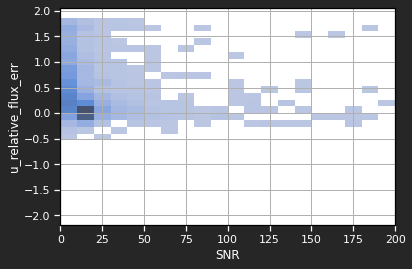

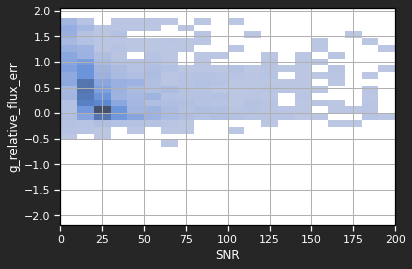

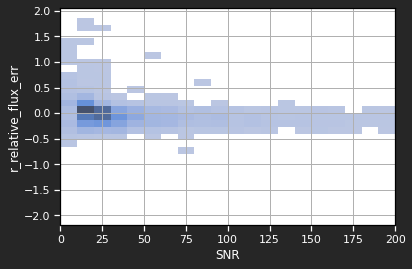

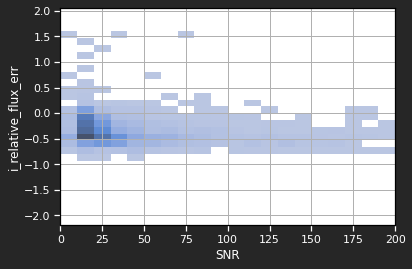

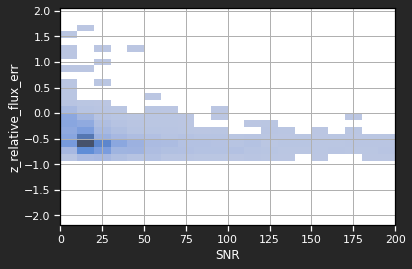

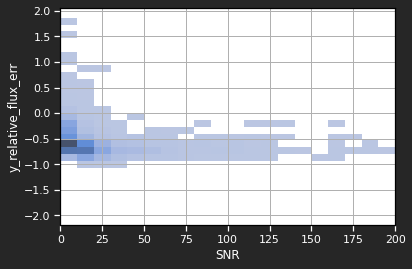

In [21]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,1000,1000/100.0)
    y_bins = np.arange(-2, 2, 4/30.0)
    sns.histplot(x=snr, y=madness_results[band+ "_relative_flux_err"], bins=[x_bins, y_bins], kde=True)
    plt.xlim(0,200)
    plt.xlabel("SNR")
    plt.show()

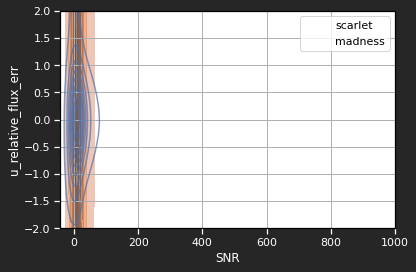

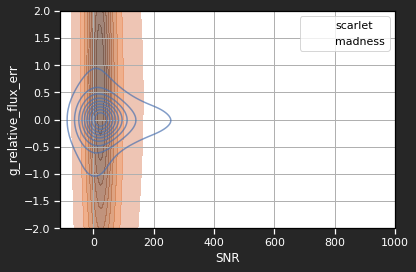

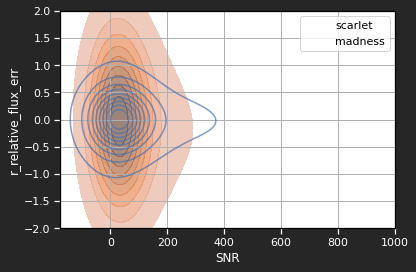

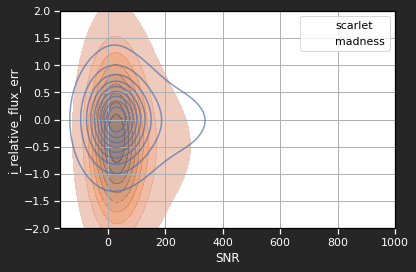

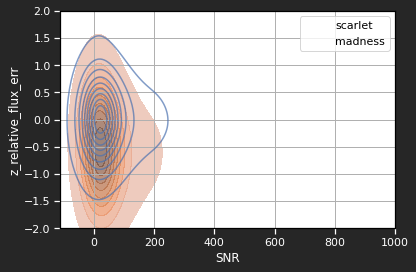

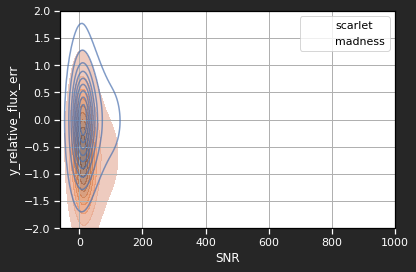

In [22]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    sns.kdeplot(x=snr, y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=True, alpha=.7, label="madness")
    plt.legend()
    plt.xlabel("SNR")
    plt.show()

# Compare with blendedness

/tmp/ipykernel_11040/3305847454.py:2: RuntimeWarning: invalid value encountered in log
  snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])


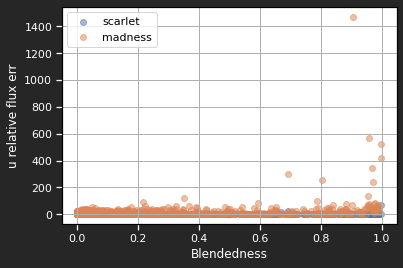

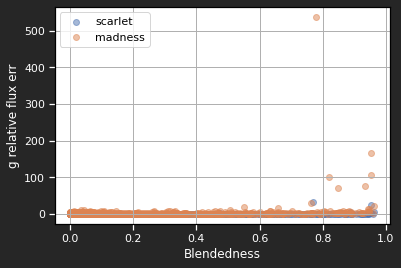

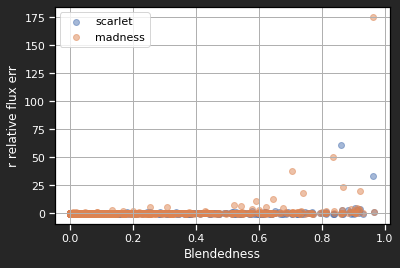

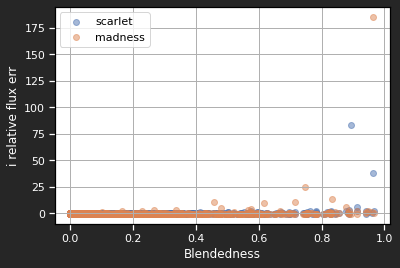

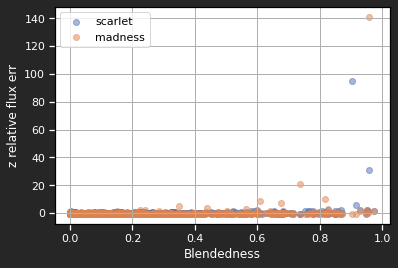

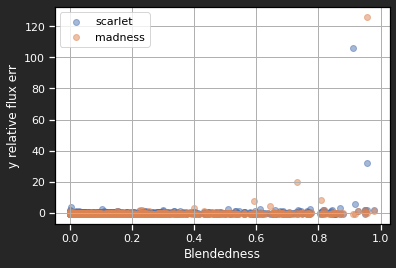

In [23]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    plt.scatter(scarlet_results[band+"_blendedness"], scarlet_results[band+ "_relative_flux_err"], alpha=.5, label="scarlet")
    plt.scatter(madness_results[band+"_blendedness"], madness_results[band+ "_relative_flux_err"], alpha=.5, label="madness")
    plt.xlabel("Blendedness")
    plt.ylabel(band+" relative flux err")
    #sns.kdeplot(x=madness_results[band+"_blendedness"], y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7)
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7
    plt.legend()
    plt.show()

In [24]:
# Validate SNR vs mag 

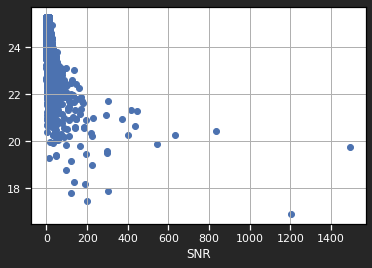

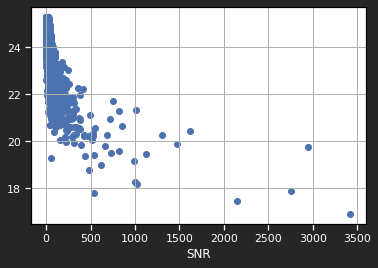

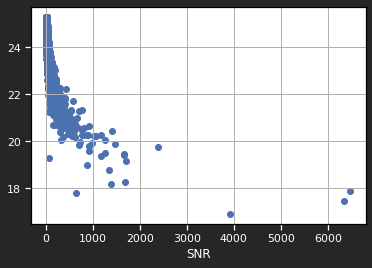

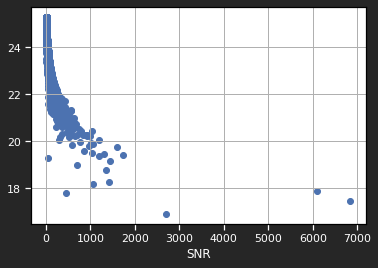

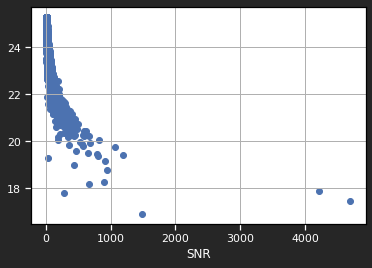

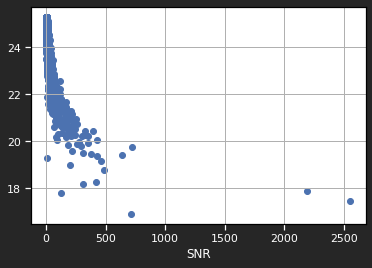

In [28]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    plt.scatter(x=snr, y=madness_results["ref_mag"])
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    plt.xlabel("SNR")
    plt.show()

Plot for u band


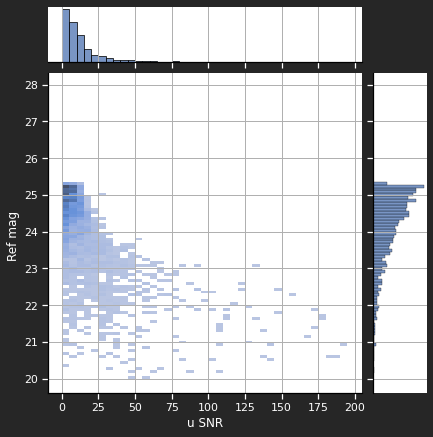

Plot for g band


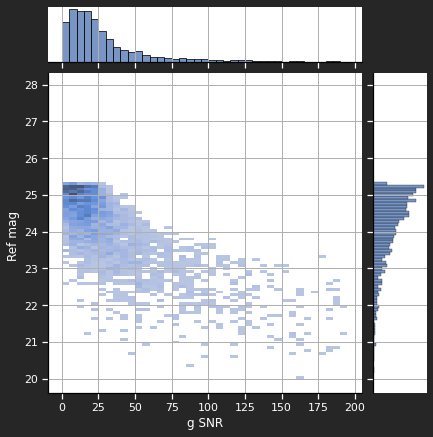

Plot for r band


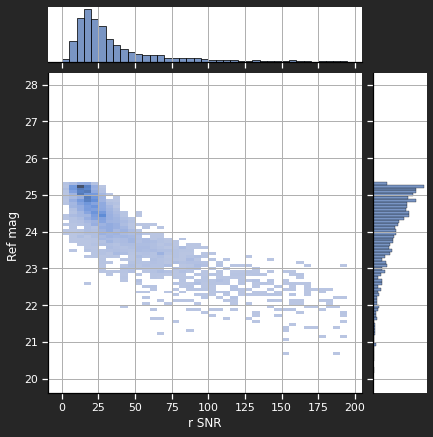

Plot for i band


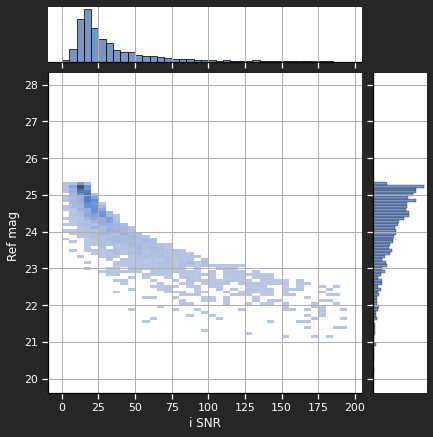

Plot for z band


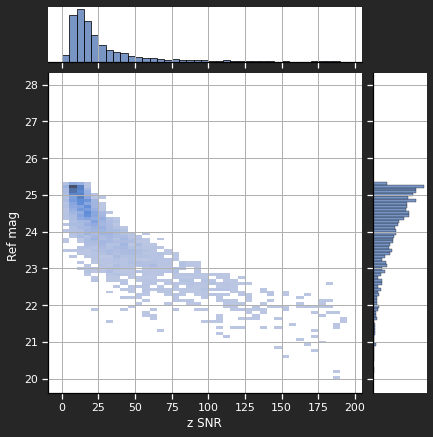

Plot for y band


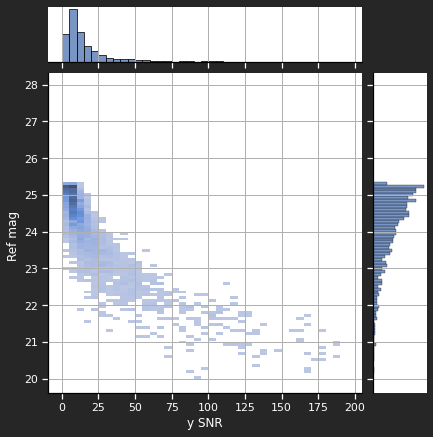

In [30]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    print(f"Plot for {band} band")
    snr = actual_photometry[band+"_flux"].value / actual_photometry[band+"_fluxerrs"].value
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,200,5.0)
    y_bins = np.arange(20, 28, 8/100.0)
    #sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, cbar=True)
    g = sns.JointGrid()
    sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, ax=g.ax_joint)
    g.ax_joint.set_xlabel(band + " SNR")
    g.ax_joint.set_ylabel("Ref mag ")
    sns.histplot(x=snr, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
    sns.histplot(y=madness_results["ref_mag"], ax=g.ax_marg_y, bins=y_bins)
    #ax.set(xlabel='SNR', ylabel='Ref Mag '+band)
    
    plt.show()

In [31]:
np.sum(madness_results['ref_mag']!=madness_results['mag_auto'])

KeyError: 'mag_auto'